In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch.nn as nn
import torch.optim as optim

In [3]:
from training import Coach
from utils import MnistData
from models import ModelManager, ModelType

In [4]:
data = MnistData()

In [5]:
performences = []

In [6]:
for i in range(100):
    print(f'Round {i}')
    fiona = ModelManager.get_untrained(ModelType.MnistCnnFiona)
    Coach.train(
        fiona,
        data,
        nn.CrossEntropyLoss(reduction='sum'),
        optim.SGD(fiona.parameters(), lr=1e-2),
        30,
        5001,
        5000
    )
    performences.append(Coach.measure_performance(fiona, data))

Round 0
Training started at 1644604900.003454
Epoch 0: 68.981689453125
Epoch 5000: 45.387969970703125
Training finished at 1644604940.5530314; lasted 40.549577474594116 seconds.
96.03 % success on test data
Round 1
Training started at 1644604941.779305
Epoch 0: 69.17648315429688
Epoch 5000: 45.926876068115234
Training finished at 1644604981.179248; lasted 39.399943113327026 seconds.
86.22999999999999 % success on test data
Round 2
Training started at 1644604982.3646197
Epoch 0: 69.03133392333984
Epoch 5000: 43.837562561035156
Training finished at 1644605021.4821053; lasted 39.11748552322388 seconds.
93.02 % success on test data
Round 3
Training started at 1644605022.6833203
Epoch 0: 69.10712432861328
Epoch 5000: 43.92543029785156
Training finished at 1644605061.948971; lasted 39.26565074920654 seconds.
94.53 % success on test data
Round 4
Training started at 1644605063.0937545
Epoch 0: 69.25016021728516
Epoch 5000: 47.834693908691406
Training finished at 1644605102.2639568; lasted 39.1

In [10]:
import json
with open('Fiona_performances.json', 'w') as file:
    json.dump(performences, file)

In [11]:
print(f'--- Foundings in experiment ---')
print(f'Mean performance: {sum(performences) / len(performences)}')
print(f'Max performance: {max(performences)}')
print(f'Min performance: {min(performences)}')

--- Foundings in experiment ---
Mean performance: 0.909556
Max performance: 0.9722
Min performance: 0.7693


In [17]:
import matplotlib.pyplot as pl
import matplotlib as mp
import matplotlib.pylab as lab

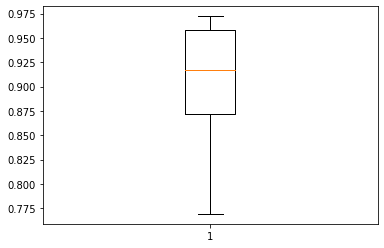

In [14]:
plot = pl.boxplot(performences)

In [16]:
performences.sort()


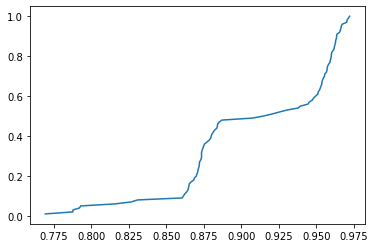

In [23]:
distribution = {}
for i in range(1, len(performences) + 1):
    distribution[performences[i - 1]] = i / len(performences)
my_list = distribution.items()
sorted(my_list)
x, y = zip(*my_list)
lab.plot(x, y)